In [60]:
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm
from datetime import datetime


BAD_GAGUES = [4139, 4651, 4701, 4702, 4201]
EVENTS_DIR = "/playpen/mufan/levi/tianlong-chen-lab/nws-lv-precip-forecasting/ccrfcd-gauge-grids/data/events"


all_event_dirs = sorted(glob(f"{EVENTS_DIR}/*"))
ex_event_dir   = all_event_dirs[0]

In [61]:
def filter_bad_gauges(df: pd.DataFrame) -> pd.DataFrame:
    mask = (df['station_id'] == 4139) | (df['station_id'] == 4651) | (df['station_id'] == 4701) | (df['station_id'] == 4702) | (df['station_id'] == 4201)
    return df[~mask]


def get_delta_qpes(df: pd.DataFrame) -> pd.DataFrame:
    EPS = 0.0000000001
    df["percent_delta_qpe"] = (df["gauge_qpe"] - df["mrms_qpe"] + EPS) / (df["mrms_qpe"] + EPS) * 100
    mask = (df['gauge_qpe'] > 0) & (df['mrms_qpe'] > 0)
    return df[mask]

# Dataset Statistics
---

In [62]:
datetimes = []

for event in all_event_dirs:
    
    try:
        dt_str   = event.split("/")[-1]
        yyyymmdd = dt_str.split(" ")[0]
        year     = int(yyyymmdd[:4])
        month    = int(yyyymmdd[5:7])
        day      = int(yyyymmdd[8:])
        dt       = datetime(year, month, day)
    except:
        continue
    
    datetimes.append(dt)

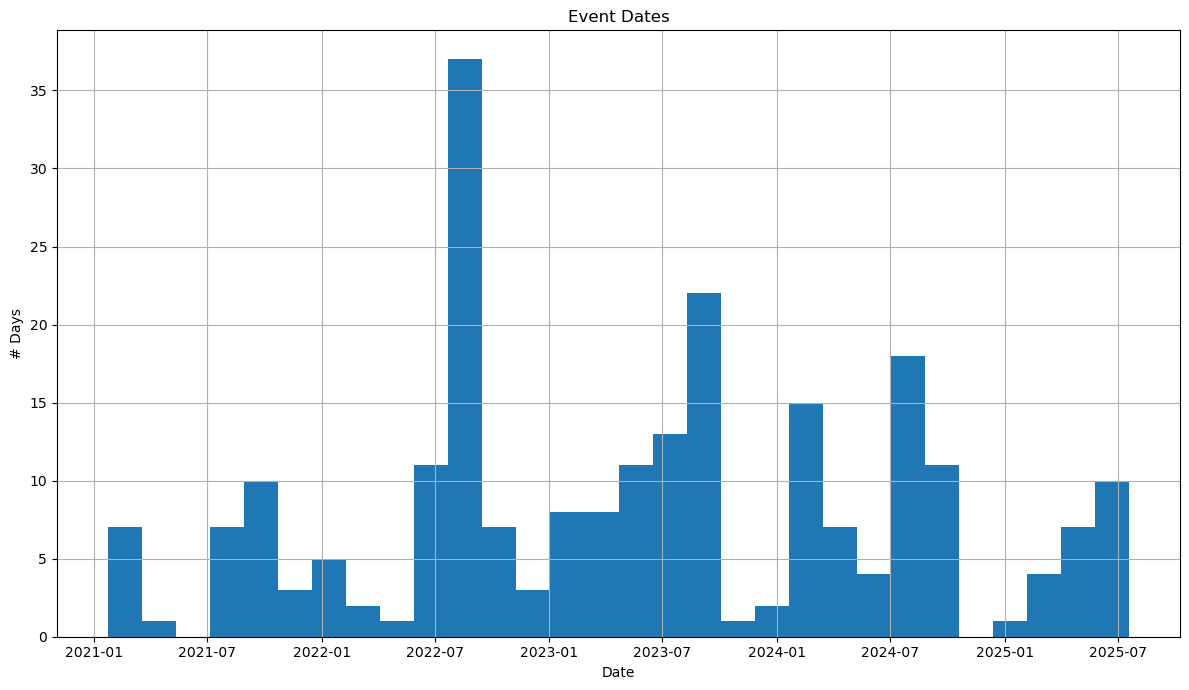

In [63]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.hist(datetimes, bins=30);
ax.set_xlabel("Date")
ax.set_ylabel("# Days")
ax.grid()

plt.title("Event Dates")
plt.tight_layout()
plt.show()

In [64]:
avg_event_biases = []
avg_event_percent_biases = []
datetimes = []

for event in tqdm(all_event_dirs):
    
    try:
        
        csv_fp    = glob(f"{event}/ccrfcd_gauge_deltas*.csv")[0]
        df        = pd.read_csv(csv_fp)
        mask      = (df['gauge_qpe'] > 0) | (df['mrms_qpe'] > 0)
        # mask      = (df['gauge_qpe'] > 0)
        masked_df = df[mask]
        masked_df = filter_bad_gauges(masked_df)
        
        avg_bias  = float(masked_df['delta_qpe'].mean())
        
        dt_str   = event.split("/")[-1]
        yyyymmdd = dt_str.split(" ")[0]
        year     = int(yyyymmdd[:4])
        month    = int(yyyymmdd[5:7])
        day      = int(yyyymmdd[8:])
        dt       = datetime(year, month, day)

        avg_event_biases.append(avg_bias)
        datetimes.append(dt)
        
        masked_df = get_delta_qpes(masked_df)
        avg_percent_bias = float(masked_df['percent_delta_qpe'].mean())
        avg_event_percent_biases.append(avg_percent_bias)
        
    except Exception as e:
        print(e)
        continue

 16%|█▋        | 39/238 [00:03<00:16, 11.94it/s]

list index out of range


 69%|██████▉   | 165/238 [00:15<00:06, 11.45it/s]

list index out of range


100%|██████████| 238/238 [00:22<00:00, 10.61it/s]

list index out of range
list index out of range


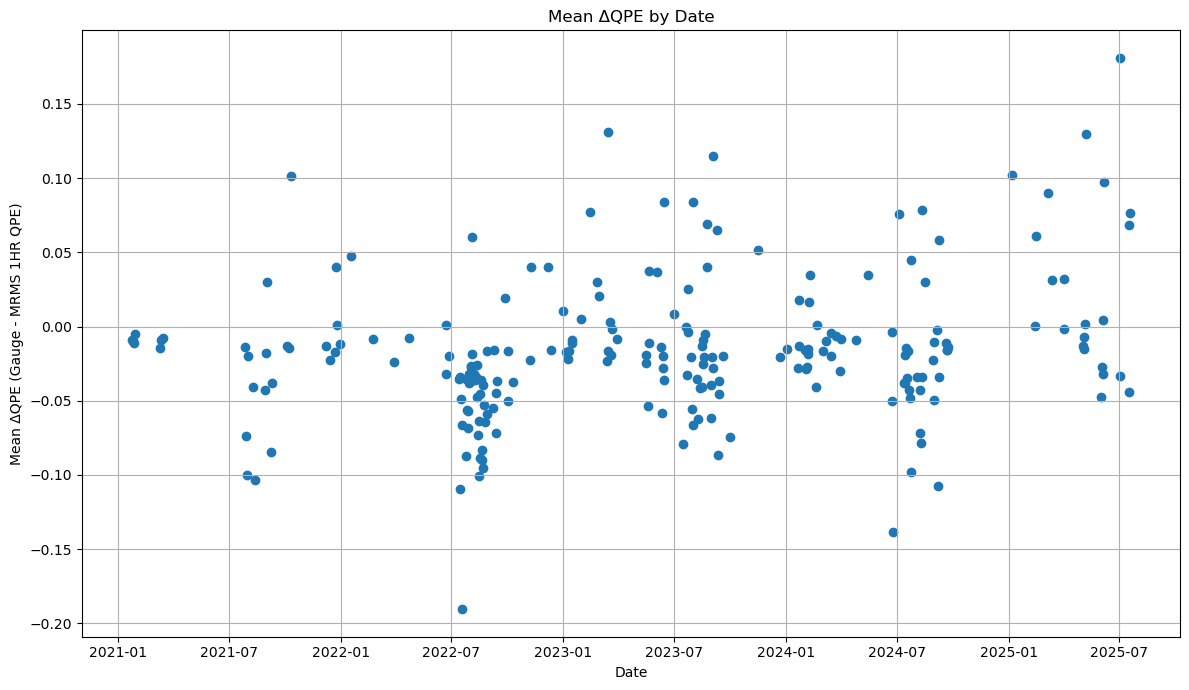

In [75]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(datetimes, avg_event_biases);
ax.set_xlabel("Date")
ax.set_ylabel("Mean ΔQPE (Gauge - MRMS 1HR QPE)")
ax.grid()

plt.title("Mean ΔQPE by Date")
plt.tight_layout()
plt.show()

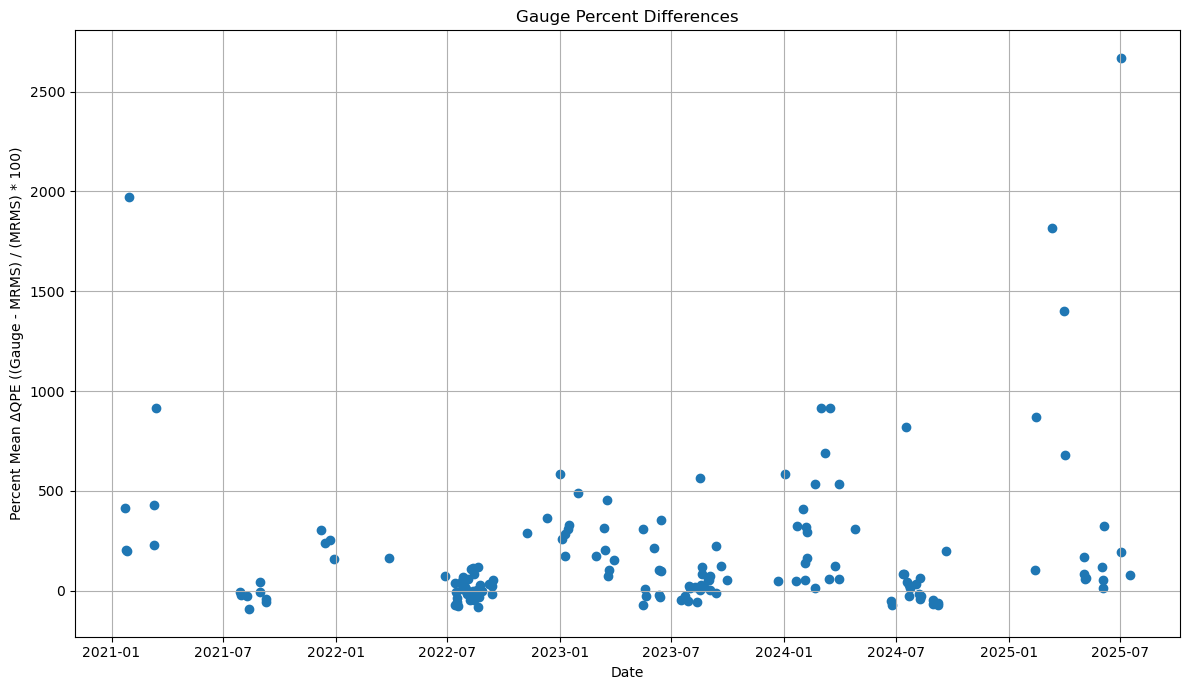

In [74]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(datetimes, avg_event_percent_biases);
ax.set_xlabel("Date")
ax.set_ylabel("Percent Mean ΔQPE ((Gauge - MRMS) / (MRMS) * 100)")
ax.grid()

plt.title("Gauge Percent Differences")
plt.tight_layout()
plt.show()

# Analyizing a Single Event
---

In [89]:
# path to MRMS/CCRFCD-aligned data
deltas_fp = glob(f"{ex_event_dir}/ccrfcd_gauge_deltas*.csv")[0]
deltas_fp = "/playpen/mufan/levi/tianlong-chen-lab/nws-lv-precip-forecasting/ccrfcd-gauge-grids/data/events/2025-07-19 00:00:00/ccrfcd_gauge_deltas_2025-07-19 00:00:00.csv"
deltas_fp

'/playpen/mufan/levi/tianlong-chen-lab/nws-lv-precip-forecasting/ccrfcd-gauge-grids/data/events/2025-07-19 00:00:00/ccrfcd_gauge_deltas_2025-07-19 00:00:00.csv'

In [96]:
df   = pd.read_csv(deltas_fp)
df   = filter_bad_gauges(df)
df.head()

,Unnamed: 0,start_time,end_time,station_id,lat,lon,gauge_qpe,mrms_qpe,delta_qpe
0,0,2025-07-20 02:08:00,2025-07-20 03:08:00,7,35.746420,245.424000,0.0,0.0,0.0
1,1,2025-07-20 02:08:00,2025-07-20 03:08:00,5,35.825780,245.403750,0.0,0.0,0.0
2,2,2025-07-20 02:08:00,2025-07-20 03:08:00,3044,36.758417,245.551000,0.0,0.0,0.0
3,3,2025-07-20 02:08:00,2025-07-20 03:08:00,2594,36.825556,245.926667,0.0,0.0,0.0
4,4,2025-07-20 02:08:00,2025-07-20 03:08:00,2674,36.817500,245.885556,0.0,0.0,0.0


In [97]:
mask = (df['gauge_qpe'] > 0) | (df['mrms_qpe'] > 0)
df[mask].head()

,Unnamed: 0,start_time,end_time,station_id,lat,lon,gauge_qpe,mrms_qpe,delta_qpe
5,5,2025-07-20 02:08:00,2025-07-20 03:08:00,3709,36.450917,244.496222,0.00,0.027559,-0.027559
71,71,2025-07-20 02:08:00,2025-07-20 03:08:00,3301,35.995444,245.136194,0.01,0.000000,0.010000
74,74,2025-07-20 02:08:00,2025-07-20 03:08:00,3644,36.507667,244.399222,0.00,0.011811,-0.011811
284,284,2025-07-19 23:36:00,2025-07-20 00:36:00,3844,36.239361,244.441083,0.00,0.023622,-0.023622
334,334,2025-07-19 23:36:00,2025-07-20 00:36:00,4203,36.173353,244.626869,0.06,0.000000,0.060000


In [99]:
# select only rows where `gauge_qpe` > 0.0 or `mrms_qpe`
df_masked             = df[mask]
df_masked['end_time'] = pd.to_datetime(df_masked['end_time'])
df_masked             = df_masked.sort_values('end_time')
df_masked             = df_masked.drop_duplicates(subset=['station_id', 'end_time'])
df_masked.head()

/tmp/ipykernel_1069742/1195335145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_masked['end_time'] = pd.to_datetime(df_masked['end_time'])


,Unnamed: 0,start_time,end_time,station_id,lat,lon,gauge_qpe,mrms_qpe,delta_qpe
3464,3464,2025-07-19 23:00:00,2025-07-20,3301,35.995444,245.136194,0.01,0.000000,0.010000
3457,3457,2025-07-19 23:00:00,2025-07-20,3834,36.249472,244.369806,0.00,0.015748,-0.015748
3544,3544,2025-07-19 23:00:00,2025-07-20,4207,36.205561,244.603298,0.05,0.000000,0.050000
3490,3490,2025-07-19 23:00:00,2025-07-20,3844,36.239361,244.441083,0.00,0.019685,-0.019685
3550,3550,2025-07-19 23:00:00,2025-07-20,4203,36.173353,244.626869,0.06,0.000000,0.060000


In [100]:
set(df_masked[df_masked["delta_qpe"] > 1.0]["station_id"])

set()

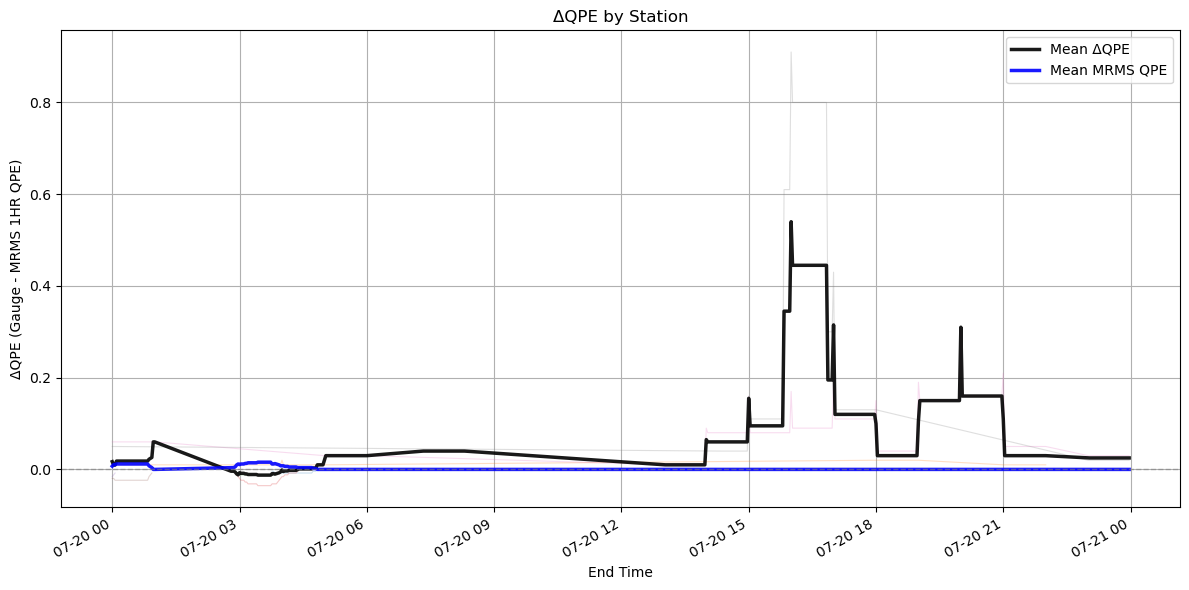

In [101]:
# calculate a trend line
mean_series = (
    df_masked.groupby('end_time')['delta_qpe']
      .mean()
      .sort_index()
)

mean_series_mrms = (
    df_masked.groupby('end_time')['mrms_qpe']
      .mean()
      .sort_index()
)

fig, ax = plt.subplots(figsize=(12, 6))

for sid, g in df_masked.groupby('station_id'):
    ax.plot(g['end_time'], g['delta_qpe'], lw=0.8, alpha=0.25)

ax.plot(mean_series.index, mean_series.values,
        lw=2.5, alpha=0.9, color='black', label='Mean ΔQPE')

ax.plot(mean_series_mrms.index, mean_series_mrms.values,
        lw=2.5, alpha=0.9, color='blue', label='Mean MRMS QPE')

ax.axhline(0, lw=1, ls='--', color='grey', alpha=0.6)
ax.set_xlabel('End Time')
ax.set_ylabel('ΔQPE (Gauge - MRMS 1HR QPE)')
ax.set_title('ΔQPE by Station')
ax.grid()
ax.legend()

fig.autofmt_xdate()

plt.tight_layout()
plt.show()